## Predict the gallstone based on various factors

In [1]:
# Load Libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotnine import *
import numpy as np # linear algebra
# import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import random
import openpyxl

In [2]:
# Read and process data 
path = "D:\\Fun Projects\\Gallstone\\gallstone_dataset.csv"
df0 = pd.read_csv(path)

#df0=pd.read_excel("D:\\Fun Projects\\Gallstone\\gallstone_dataset.xlsx")
df0.head() #print(df0.columns)

# select specific columns
df1 = df0[["Gallstone Status","Vitamin D","Total Body Water (TBW)","Lean Mass (LM) (%)","C-Reactive Protein (CRP)"]]
df1.head()

,Gallstone Status,Vitamin D,Total Body Water (TBW),Lean Mass (LM) (%),C-Reactive Protein (CRP)
0,0,33.0,52.9,80.84,0.0
1,0,25.0,43.1,67.20,0.0
2,0,30.2,47.2,72.67,0.0
3,0,35.4,41.4,84.19,0.0
4,0,40.6,51.4,80.02,0.0


In [3]:
# Use melt function for the histograms
df2 = pd.melt(df1, id_vars=['Gallstone Status'])
df2.head()

,Gallstone Status,variable,value
0,0,Vitamin D,33.0
1,0,Vitamin D,25.0
2,0,Vitamin D,30.2
3,0,Vitamin D,35.4
4,0,Vitamin D,40.6


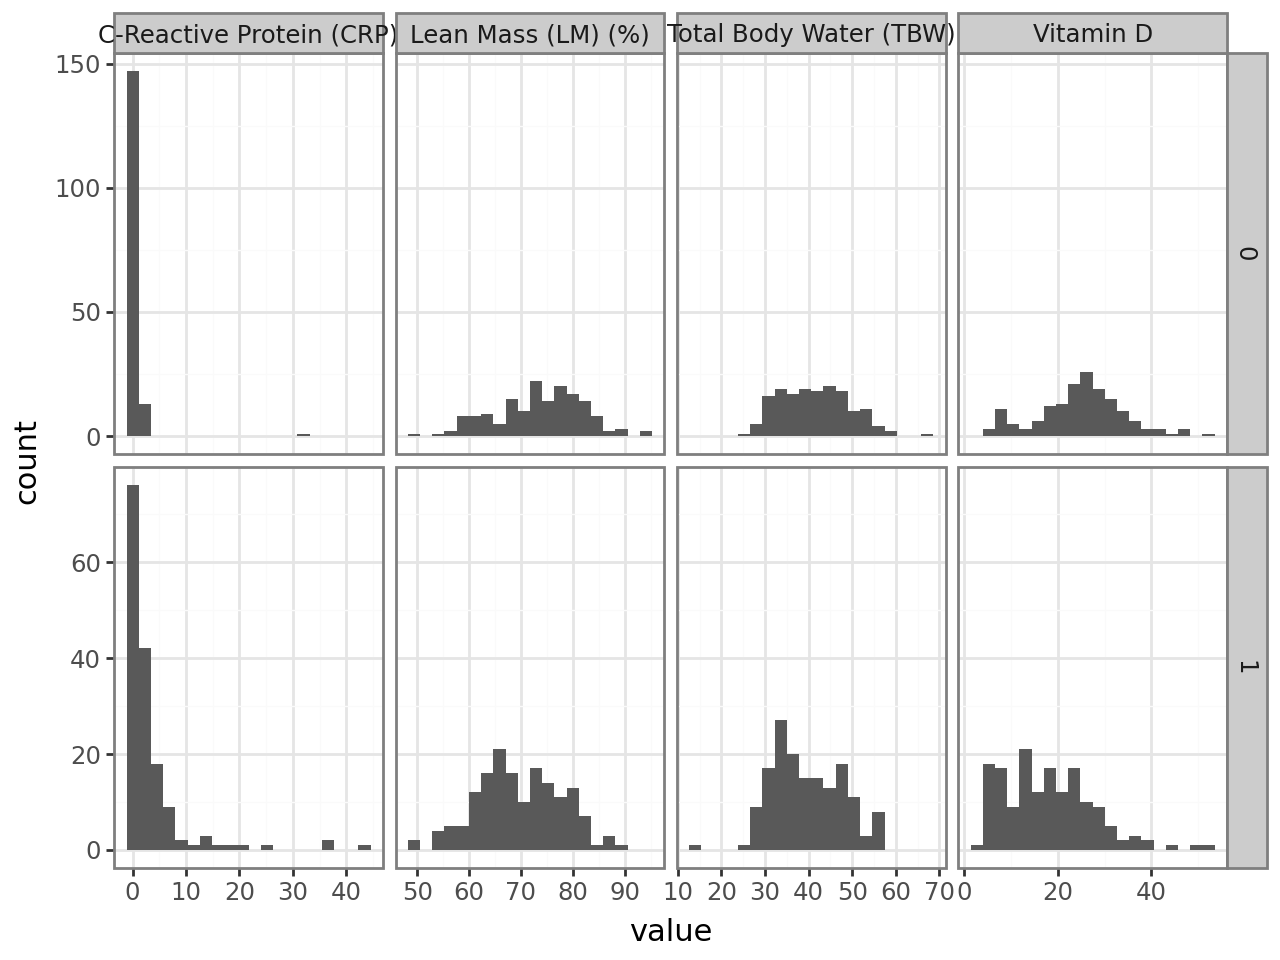

In [4]:
p = (
    ggplot(df2, aes("value"))
    + geom_histogram(bins=20)
    + facet_grid("Gallstone Status ~ variable", scales="free")+
    theme_bw()
    )

p.show()

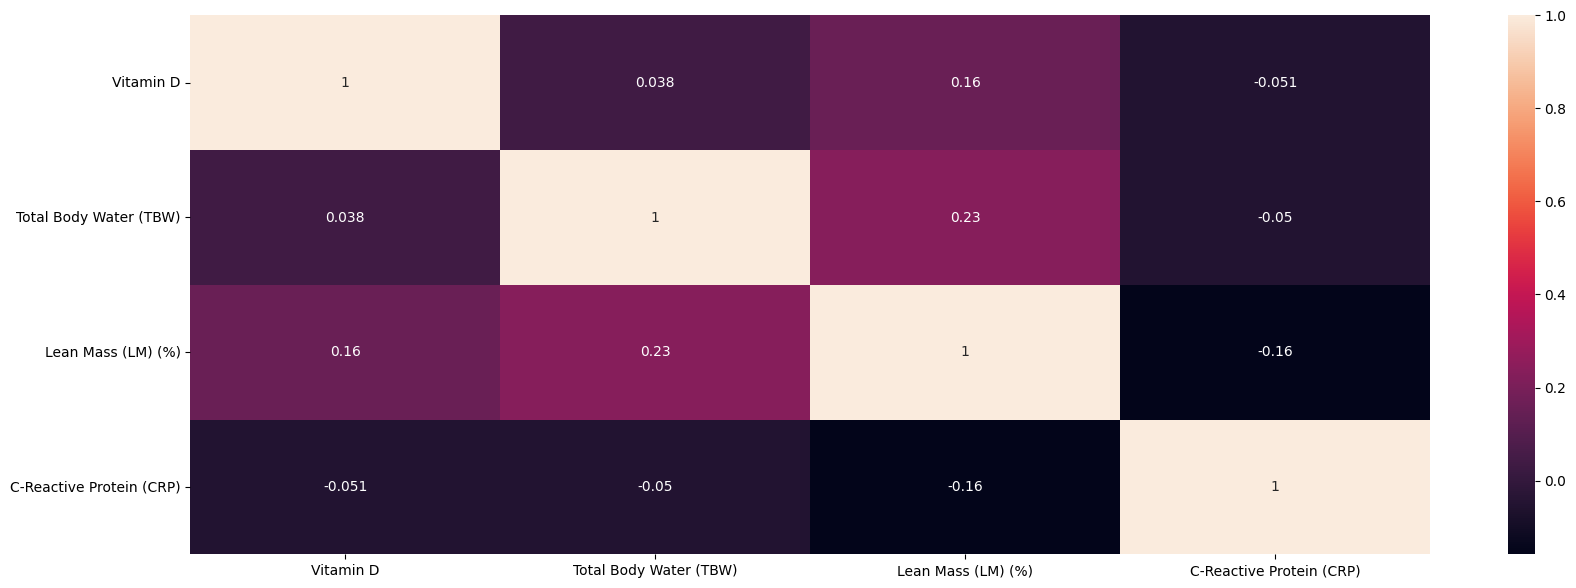

In [5]:
# Correlation plot
plt.figure(figsize=(20,7))
sns.heatmap(df1.iloc[:,1:].corr(),annot=True)
plt.show()

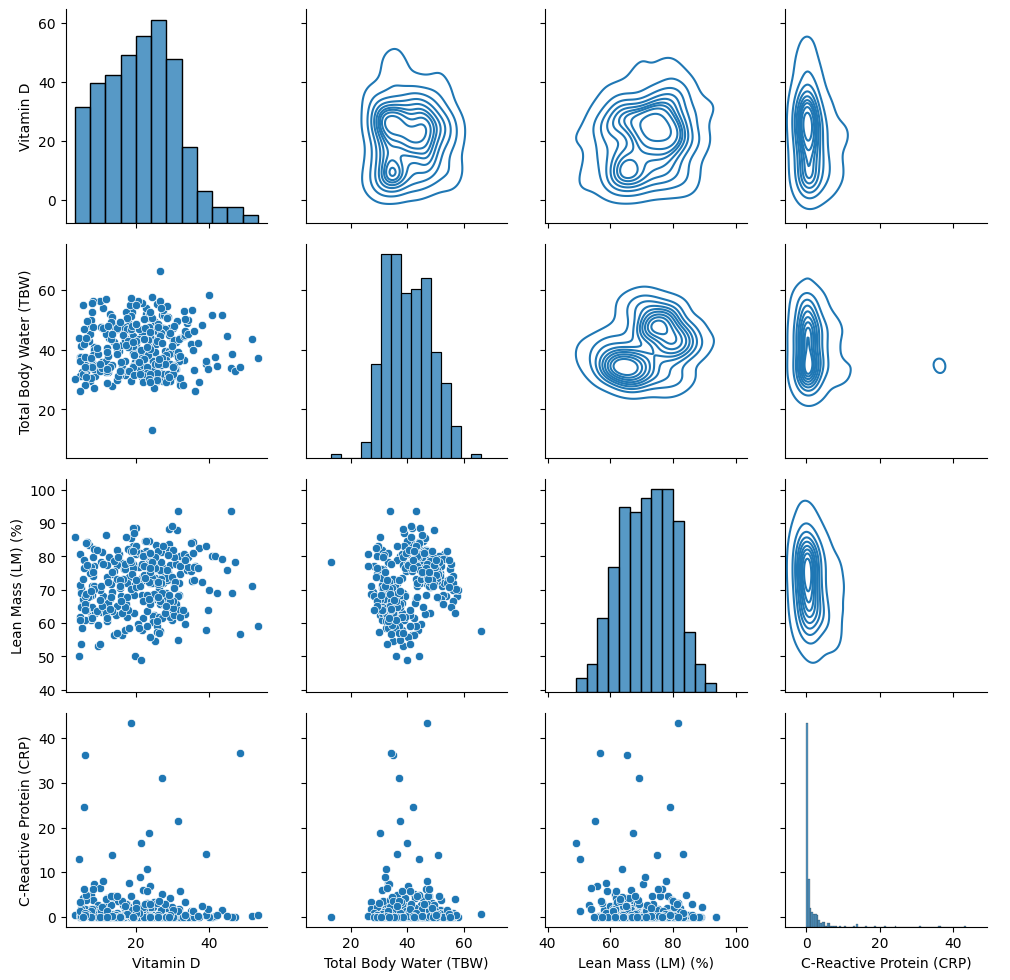

In [6]:
# Pairs plot
g = sns.PairGrid(df1.iloc[:,1:], diag_sharey=False, corner=False)
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.add_legend()
plt.show()

In [83]:
# Split data into train and test set
#indices = range(len(df)) # Create a list of indices
# Get 3 random indices
#random_indices = random.sample(indices, round(0.75*len(df)))
# Training dataset
#data_train = df.iloc[random_indices,]
# Testing dataset
#data_test = df.iloc[df.index.difference(random_indices),]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing set
df_train0, df_test0 = train_test_split(df1, test_size=0.3, random_state=23)

# Scale (exclude first column)
scaler = StandardScaler()

df_train = df_train0.copy()
df_test = df_test0.copy()

df_train.iloc[:, 1:] = scaler.fit_transform(df_train0.iloc[:, 1:])
df_test.iloc[:, 1:] = scaler.transform(df_test0.iloc[:, 1:])

X_train = df_train.iloc[:,1:]
X_test = df_test.iloc[:,1:]
y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:,0]

In [87]:
# Standardize the data (makes the variable with mean 0 and sd = 1
#from sklearn.preprocessing import StandardScaler
# Initialize the scaler
#scaler = StandardScaler()
# Fit and transform the data (except the first column (response)
#df = df1.copy()
#df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
#print(df)

     Gallstone Status  Vitamin D  Total Body Water (TBW)  Lean Mass (LM) (%)  \
0                   0   1.163816                1.555007            1.092279   
1                   0   0.361087                0.317289           -0.526834   
2                   0   0.882861                0.835109            0.122473   
3                   0   1.404634                0.102582            1.489935   
4                   0   1.926408                1.365560            0.994942   
..                ...        ...                     ...                 ...   
314                 1  -1.314611                0.885629            0.426353   
315                 1   0.260745               -1.425621            0.565236   
316                 1  -0.572086                1.087705           -0.049647   
317                 1   1.193918                1.214003            0.856060   
318                 1   0.762451               -1.248804           -0.372520   

     C-Reactive Protein (CRP)  
0      

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Model coefficients
#print("Intercept:", model.intercept_)
#print("Coefficient:", model.coef_)

Confusion Matrix:
 [[36 15]
 [11 34]]
Accuracy: 0.7291666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.73        51
           1       0.69      0.76      0.72        45

    accuracy                           0.73        96
   macro avg       0.73      0.73      0.73        96
weighted avg       0.73      0.73      0.73        96



In [11]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score
k_values = range(1, 11)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5).mean()
    scores.append(score)

best_k = k_values[np.argmax(scores)]
print("Best k:", best_k)

Best k: 7


In [12]:
# Create KNN model using the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[38 13]
 [12 33]]
Accuracy: 0.7395833333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75        51
           1       0.72      0.73      0.73        45

    accuracy                           0.74        96
   macro avg       0.74      0.74      0.74        96
weighted avg       0.74      0.74      0.74        96



In [13]:
# svm 
from sklearn.svm import SVC
# Identify the best parameter through CV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [14]:
# Create SVM model using the best parameters
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[38 13]
 [14 31]]
Accuracy: 0.71875

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        51
           1       0.70      0.69      0.70        45

    accuracy                           0.72        96
   macro avg       0.72      0.72      0.72        96
weighted avg       0.72      0.72      0.72        96



In [ ]:
# Combine the results of all the models.